In [ ]:
# Day 1 of Machine Learning Algorithm

# 1. Linear Regression:
#1.1. Simple Linear Regression
#1.2. Multiple Linear Regression
#1.3. Polynomial Regression
#1.5. Regularization

#1.6. Decision Tree Regression
#1.7. Random Forest Regression
#1.8. Gradient Boosting Regression
#1.9. XGBoost Regression
#1.10. LightGBM Regression
#1.11. CatBoost Regression



In [ ]:
# Simple Linear Regression

# Simple Linear Regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
# One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
# The other variable, denoted y, is regarded as the response, outcome, or dependent variable.

# The goal of simple linear regression is to fit a straight line to the data that best explains the relationship between the variables.
# The line is described by the equation y = b0 + b1*x, where b0 is the intercept and b1 is the slope.

# The simple linear regression equation is represented as:
# y = b0 + b1*x
# where:
# y is the dependent variable,
# x is the independent variable,
# b0 is the intercept,
# b1 is the slope of the line.


In [1]:
# Example:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [85]:
# Create a dataset of cgpa and salary 1000 students. The gpa should be between 2 and 4 with only one folating point numbers and salary should be 5000 + 1000 * cgpa + random number between 1 and 1000. 

np.random.seed(0)
cgpa = np.around(np.random.uniform(2, 4, 1000), 2)
salary = 6201.24 + 949 * cgpa + np.random.randint(-1, 50, 1000)+ np.random.uniform(0, 100, 1000)+ np.random.randint(-100, 1000, 1000) + np.random.uniform(1, 1100, 1000)


In [86]:
df = pd.DataFrame({'cgpa:': cgpa, 'salary': salary})
df

,cgpa:,salary
0,3.10,9995.274696
1,3.43,11093.571432
2,3.21,9824.902228
3,3.09,10215.944835
4,2.85,10276.794852
...,...,...
995,2.20,9125.527059
996,3.03,10750.078943
997,3.88,10082.924433
998,2.46,9732.186899


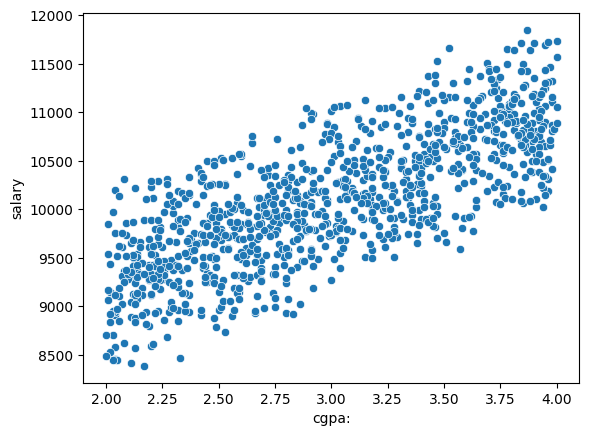

In [87]:
# Plot the data
import seaborn as sns
sns.scatterplot(x='cgpa:', y='salary', data=df)
plt.show()

In [88]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Split the data into training and testing data
X = df[['cgpa:']]
y = df['salary']


           Actual     Predicted
993   9482.366427  10105.464759
859   9933.083908   9845.044495
298  10337.191022  10949.585616
553   9678.109854  10132.404787
672  10401.365052  10303.024960
..            ...           ...
679   9929.477320   9925.864577
722  10138.400725   9252.363894
215  11151.272331  10563.445224
653   9137.284407   9503.804149
150   9963.238528   9467.884113

[200 rows x 2 columns]
Mean Absolute Error: 347.8247446711197
Mean Squared Error: 188161.89437057692
Root Mean Squared Error: 433.7763183607156


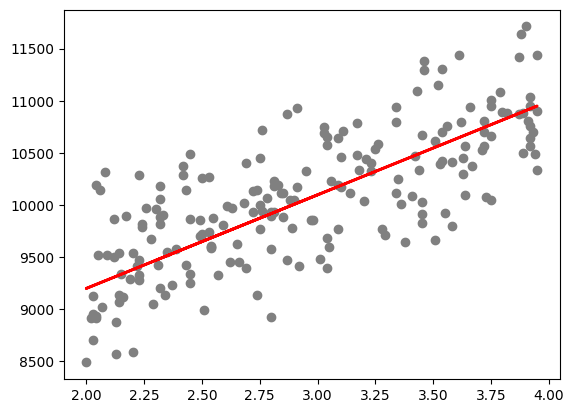

[10545.48520571]


c:\Users\hp\gitdemo\DataScienceAZ\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [89]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions  
y_pred = model.predict(X_test)

# Compare the actual output and predicted output
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Plot the regression line
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# Predict the salary of a student with cgpa 3.5
print(model.predict([[3.5]]))



In [90]:
# Slope and Intercept of the line
print('Slope:', model.coef_)
print('Intercept:', model.intercept_)


Slope: [898.00091092]
Intercept: 7402.482017487022


In [91]:
# Performance metices
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 347.8247446711197
Mean Squared Error: 188161.89437057692
R2 Score: 0.5457360690374697


In [93]:
# Multiple Linear Regression
# Multiple Linear Regression is a statistical method that allows us to study the relationship between two or more continuous variables.
# It is a generalization of simple linear regression.
# It helps us to understand the influence of multiple independent variables on the dependent variable.


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create a dataset of cgpa, gre score and salary of 1000 students. The cgpa should be between 2 and 4 with only one folating point numbers, gre score should be between 260 and 340 and salary should be 5000 + 1000 * cgpa + 200 * gre score + random number between 1 and 1000.

np.random.seed(0)
cgpa = np.around(np.random.uniform(2, 4, 1000), 2)
gre_score = np.random.randint(260, 340, 1000)
salary = 5000 + 1000 * cgpa + 200 * gre_score + np.random.randint(-1, 50, 1000)+ np.random.uniform(0, 100, 1000)+ np.random.randint(-100, 1000, 1000) + np.random.uniform(1, 1100, 1000)

df = pd.DataFrame({'cgpa:': cgpa, 'gre_score': gre_score, 'salary': salary})
df


,cgpa:,gre_score,salary
0,3.10,289,66647.270295
1,3.43,330,75120.361310
2,3.21,288,67206.111260
3,3.09,334,76169.870962
4,2.85,265,61997.006941
...,...,...,...
995,2.20,335,75197.090326
996,3.03,330,75037.322352
997,3.88,338,78226.810424
998,2.46,306,69959.297134


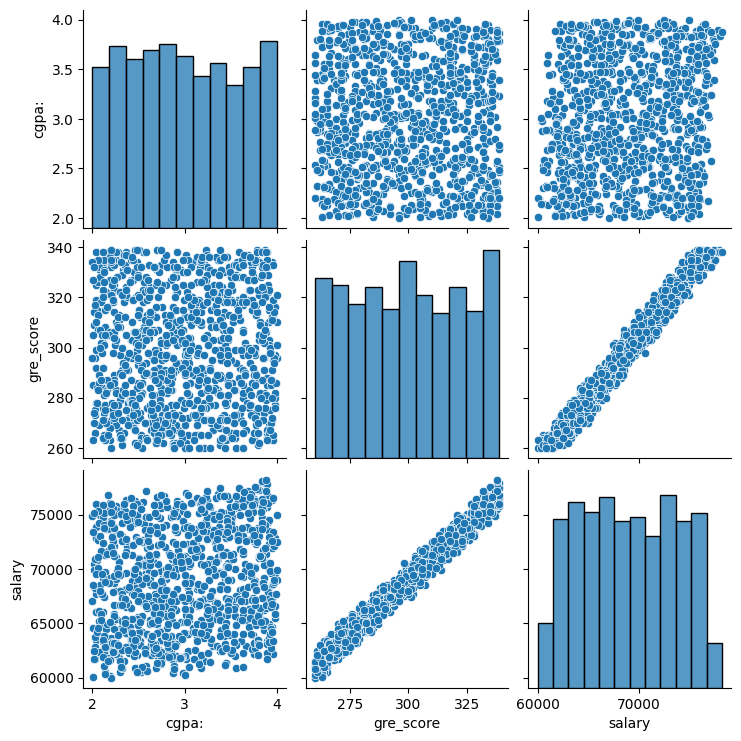

In [95]:
# Plot the data
sns.pairplot(df)
plt.show()


In [96]:
# Split the data into training and testing data
X = df[['cgpa:', 'gre_score']]
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compare the actual output and predicted output
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)


           Actual     Predicted
993  69471.758775  69453.650056
859  75841.933825  74755.196060
298  72539.038107  72431.634420
553  76850.272633  76088.294494
672  66596.299561  66480.613886
..            ...           ...
679  65633.855577  66244.216412
722  75354.097026  75069.788672
215  74786.307915  74185.894238
653  75941.458135  75761.000377
150  64466.765976  64113.337501

[200 rows x 2 columns]


In [97]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 390.0531438547457
Mean Squared Error: 227749.93148883843
Root Mean Squared Error: 477.23152817981173


In [98]:
# Performance metices
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 390.0531438547457
Mean Squared Error: 227749.93148883843
R2 Score: 0.989973834978411


In [99]:
# Slope and Intercept of the line
print('Slope:', model.coef_)
print('Intercept:', model.intercept_)


Slope: [1039.29165496  200.10502087]
Intercept: 5893.66587292427


In [100]:
# Polynomial Regression
# Polynomial Regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial.
# Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).
# The equation is given by:
# y = b0 + b1*x + b2*x^2 + b3*x^3 + ... + bn*x^n
# where:
# y is the dependent variable,
# x is the independent variable,


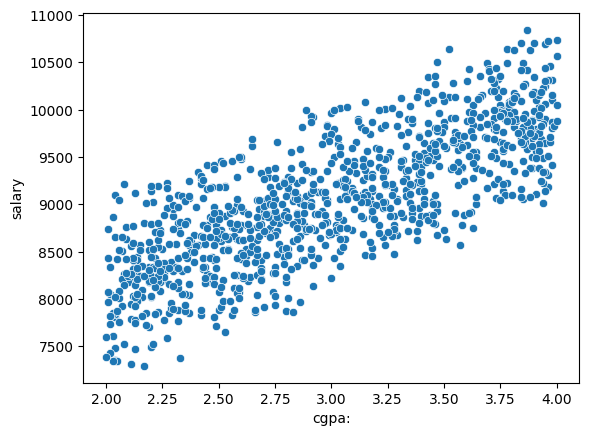

           Actual    Predicted
993   8434.636427  9061.927061
859   8870.563908  8785.595539
298   9337.401022  9943.117723
553   8631.909854  9090.392648
672   9364.855052  9270.150314
..            ...          ...
679   8871.547320  8871.579409
722   9042.220725  8148.837345
215  10129.552331  9542.771003
653   8055.384407  8420.311981
150   8879.298528  8381.650323

[200 rows x 2 columns]
Mean Absolute Error: 347.36532765884635
Mean Squared Error: 188142.0980769021
Root Mean Squared Error: 433.75349920997996


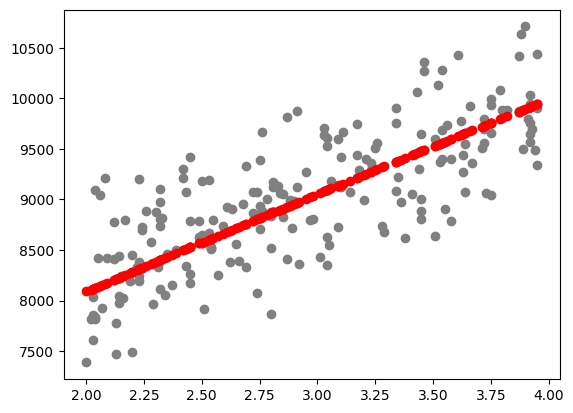

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

# Create a dataset of cgpa and salary of 1000 students. The cgpa should be between 2 and 4 with only one folating point numbers and salary should be 5000 + 1000 * cgpa + random number between 1 and 1000.

np.random.seed(0)
cgpa = np.around(np.random.uniform(2, 4, 1000), 2)
salary = 5000 + 1000 * cgpa + np.random.randint(-1, 50, 1000)+ np.random.uniform(0, 100, 1000)+ np.random.randint(-100, 1000, 1000) + np.random.uniform(1, 1100, 1000)

df = pd.DataFrame({'cgpa:': cgpa, 'salary': salary})
df

# Plot the data
import seaborn as sns
sns.scatterplot(x='cgpa:', y='salary', data=df)
plt.show()

# Split the data into training and testing data
X = df[['cgpa:']]
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Polynomial Regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()

# Train the model
model.fit(X_poly, y_train)

# Make predictions
X_test_poly = poly.fit_transform(X_test)
y_pred = model.predict(X_test_poly)

# Compare the actual output and predicted output
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Plot the regression line
plt.scatter(X_test, y_test, color='gray')
plt.scatter(X_test, y_pred, color='red')
plt.show()


In [ ]:
# we can now know about the working of linear regression as well 